# Titanic: Machine Learning from Disaster

## 1 Import libraries

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

## 2 Load data

In [88]:
df = pd.read_csv("../Data/Titanic/train.csv")
df_test = pd.read_csv("../Data/Titanic/test.csv")
df_full = df.append(df_test, ignore_index=True)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We find the attributes including *'Age'*, *'Cabin'*, *'Embarked'* have NAN

### Data Dictionary

|**Variable**	|**Definition**	|**Key**|
|:---------------:|:---------------:|:-------:|
|survival	    |Survival	    |0 = No, 1 = Yes    |
|pclass	        |Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex|	|
|Age	|Age in years	||
|sibsp	|# of siblings / spouses aboard the Titanic	||
|parch	|# of parents / children aboard the Titanic	||
|ticket	|Ticket number	||
|fare	|Passenger fare	||
|cabin	|Cabin number	||
|embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes

+ **pclass:** A proxy for socio-economic status (SES)

    1st = Upper

    2nd = Middle

    3rd = Lower

+ **age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

+ **sibsp:** The dataset defines family relations in this way...

    *Sibling* = brother, sister, stepbrother, stepsister
    
    *Spouse* = husband, wife (mistresses and fiancés were ignored)

+ **parch:** The dataset defines family relations in this way...

    *Parent* = mother, father

    *Child* = daughter, son, stepdaughter, stepson

+ **Some children travelled only with a nanny, therefore parch=0 for them.**

## 3 Exploratory Data Analysis

### 3.1 Sex distribution between survivor and dead people

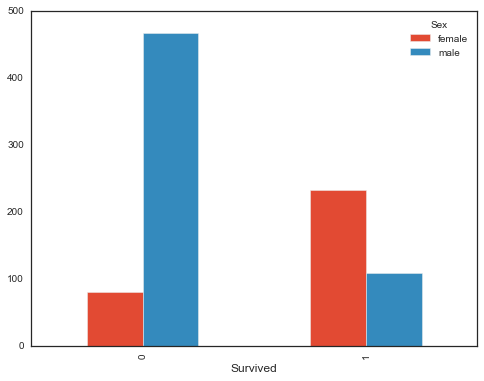

In [5]:
grouped_sex = df.groupby(['Survived','Sex'])['PassengerId'].size().unstack()
grouped_sex.plot(kind='bar')

In [17]:
grouped_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


We can get four statisitic information:
1. 14.75% of dead people are female, but 85.25% are male;
2. 68.13% of survivors are female, but 31.87% are male.
3. 74.20% of female people are survived;
4. 18.89% of male people are survied.

So **SEX** is an important feature.

### 3.2 Pclass distribution

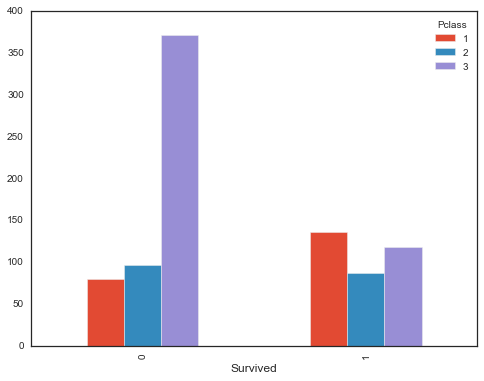

In [6]:
grouped_pclass = df.groupby(['Survived','Pclass'])['PassengerId'].size().unstack()
grouped_pclass.plot(kind='bar')

In [19]:
grouped_pclass

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


So **Pclass** is an important feature.

### 3.3 The first letter of passenger's name distribution --Just for fun

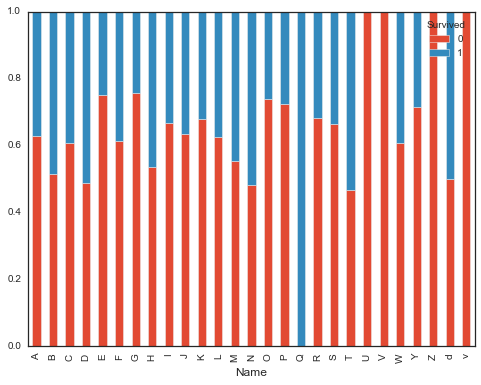

In [7]:
f = lambda x: x[0]
first_letter = df.Name.map(f)
cnt_first = df.groupby(first_letter).size()
df_first = DataFrame(cnt_first, columns=['Total'])
grouped_first = df.groupby([first_letter, 'Survived']).size().unstack().fillna(0)
# grouped_merge = pd.merge(grouped_first, df_first, left_index = True, right_index=True)
# grouped_merge
#grouped_first
grouped_first.div(grouped_first.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

From the picture above, we can find the first letter have influence on the survived situation approximately. But It's because the dataset is small and bias probably. **We can't consider the feature by our intuition **

### 3.4 Age distribution

In [65]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df_tmp = df[df.Age.notnull()]
labels = pd.cut(df_tmp.Age, 10)
pd.crosstab(df_tmp.Survived, labels, margins=True)

Age,"(0.34, 8.378]","(8.378, 16.336]","(16.336, 24.294]","(24.294, 32.252]","(32.252, 40.21]","(40.21, 48.168]","(48.168, 56.126]","(56.126, 64.084]","(64.084, 72.042]","(72.042, 80]",All
Survived,,,,,,,,,,,
0,18,27,114,104,66,46,24,15,9,1,424
1,36,19,63,65,52,24,21,9,0,1,290
All,54,46,177,169,118,70,45,24,9,2,714


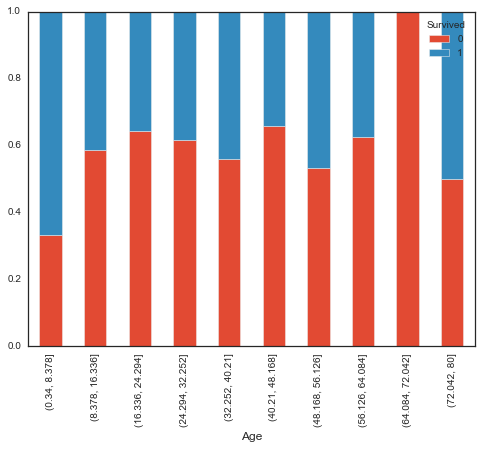

In [10]:
grouped_label = df_tmp.groupby(['Survived', labels]).size().unstack(0).fillna(0)
grouped_label.div(grouped_label.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ylim=[0,1])

## 4 Feature Engineering

### 4.1 Pclass

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [89]:
pclass_feature = pd.get_dummies(df_full['Pclass'], prefix='Pclass')
pclass_feature.head()

,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


### 4.2 Name

In [90]:
f = lambda name: name.split(',')[1].split('.')[0].strip()
name_feature = DataFrame(df_full['Name'].map(f))#, columns=['Title'])
name_feature.columns = ['Title']
#name_feature.info()
df_tmp = pd.merge(df_full, name_feature, left_index=True, right_index=True)

In [91]:
dic = {
    'Capt' : 'Other',
    'Col' : 'Other',
    'Don' : 'Other',
    'Dr' : 'Other',
    'Jonkheer' : 'Other',
    'Lady' : 'Mrs',
    'Major' : 'Other',
    'Master': 'Master',
    'Miss' : 'Mrs',
    'Mlle' : 'Mrs',
    'Mme' : 'Mrs',
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Ms' : 'Mrs',
    'Rev' : 'Other',
    'Sir' : 'Other',
    'the Countess' : 'Other',
}

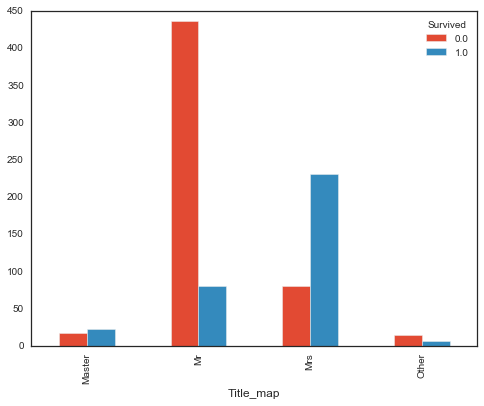

In [92]:
df_tmp['Title_map'] = df_tmp['Title'].map(dic)

df_tmp.groupby(['Title_map', 'Survived'])['PassengerId'].size().unstack().plot(kind='bar')

In [94]:
title_feature = pd.get_dummies(df_tmp['Title_map'], prefix='Title')

title_feature.head()
#title_feature.info()

,Title_Master,Title_Mr,Title_Mrs,Title_Other
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0


### 4.3 Sex

In [97]:
sex_feature = DataFrame(df_full['Sex'].map({'male':1, 'female':0}))

sex_feature.head()
#sex_feature.info()

,Sex
0,1
1,0
2,0
3,0
4,1


### 4.4 Age

In [98]:
age_feature = DataFrame(df_full['Age'].fillna(df_full.Age.mean())) #Fill missing data
age_feature.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


### 4.5 SibSp & Parch

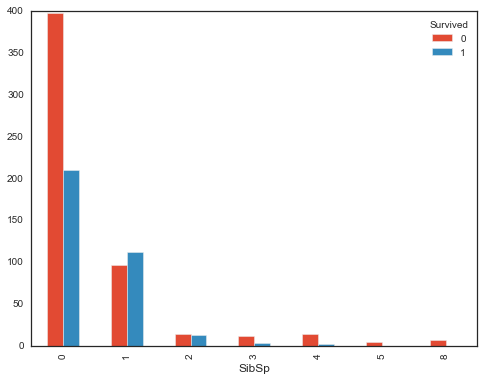

In [51]:
df.groupby(['SibSp', 'Survived'])['PassengerId'].size().unstack().plot(kind='bar')

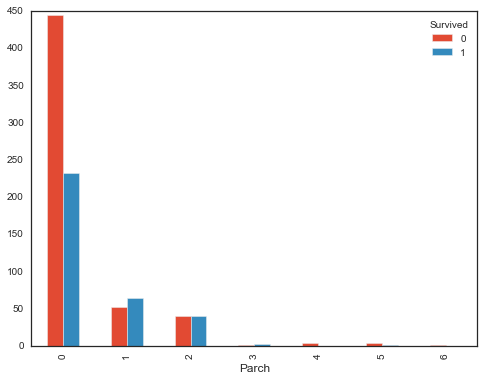

In [52]:
df.groupby(['Parch', 'Survived'])['PassengerId'].size().unstack().plot(kind='bar')

In [99]:
sibsp_feature = DataFrame(df_full['SibSp'])
parch_feature = DataFrame(df_full['Parch'])

### 4.6 Ticket -- Ignore

### 4.7 Fare

In [100]:
fare_feature = DataFrame(df_full['Fare'].fillna(df_full.Fare.mean()))
fare_feature.head()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


### 4.8 Cabin--Ignore

### 4.9 Embarked

In [101]:
#Fill missing data
#df['Embarked'].value_counts()
embarked_feature = DataFrame(df_full['Embarked'].fillna('S').map({'S':1, 'C':2, 'Q':3}))

In [102]:
embarked.head()

,Embarked
0,1
1,2
2,1
3,1
4,1


In [106]:
feature = pd.concat([pclass_feature,  title_feature, sex_feature,\
                     age_feature, sibsp_feature, parch_feature, fare_feature, embarked_feature], axis=1)

In [107]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Pclass_1        1309 non-null float64
Pclass_2        1309 non-null float64
Pclass_3        1309 non-null float64
Title_Master    1309 non-null float64
Title_Mr        1309 non-null float64
Title_Mrs       1309 non-null float64
Title_Other     1309 non-null float64
Sex             1309 non-null int64
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Fare            1309 non-null float64
Embarked        1309 non-null int64
dtypes: float64(9), int64(4)
memory usage: 143.2 KB


## 5 Build model

### 5.1 Import sklearn

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

### 5.2 Split data

In [110]:
train_X = feature[:891]
train_y = df['Survived']
test_X = feature[891:]
print train_X.shape, train_y.shape, test_X.shape

(891, 13) (891L,) (418, 13)


### 5.3 Logistic Regression

In [116]:
logreg = SVC()
logreg.fit(train_X, train_y)
test_y = logreg.predict(test_X)

In [117]:
print logreg.score(train_X, train_y)

0.886644219978


In [115]:
test_y

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

### 5.4 Submission

In [118]:
submission = DataFrame({
        'PassengerId' : df_test['PassengerId'],
        'Survived' : test_y
    })

In [120]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [122]:
submission.to_csv('mySubmission.csv', index=False)